# Jeju Competition with LGBM

In [1]:
'''
다음의 순서로 진행
1. 필요 모듈 불러오기
2. 데이터 불러오기
3. EDA
4. 데이터 시각화
5. Data Cleaning
6. Model Fitting
7. Prediction
'''

'\n다음의 순서로 진행\n1. 필요 모듈 불러오기\n2. 데이터 불러오기\n3. EDA\n4. 데이터 시각화\n5. Data Cleaning\n6. Model Fitting\n7. Prediction\n'

## 1. 필요 모듈 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
from tqdm import tqdm_notebook, tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc
import matplotlib
import update
import jeju as jeju

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())

font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

버전:  3.2.2
설치 위치:  /opt/anaconda3/envs/venv1/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /Users/keom/.matplotlib
캐시 위치:  /Users/keom/.matplotlib
설정파일 위치:  /opt/anaconda3/envs/venv1/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
362


/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.


[('Noto Sans Gothic',
  '/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf'),
 ('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc'),
 ('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf'),
 ('Hiragino Maru Gothic Pro', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc')]

In [3]:
#폰트 경로
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#font 설정
matplotlib.rc('font',family=font_name)

print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 1.0.5
Numpy : 1.18.5
Scikit-Learn : 0.23.1
Python 3.7.7


## 2. 원데이터 불러오기

In [4]:
data = pd.read_csv('./jeju_data_ver1/201901-202003.csv')
data_04 = pd.read_csv('./202004.csv')
data = pd.concat([data, data_04], axis=0)
data.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
1350317,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5
1350318,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6
1350319,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5
1350320,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7
1350321,202004,충북,충주시,휴양콘도 운영업,충북,충주시,60s,2,5,3,227000,4


## 3. EDA

In [5]:
categ = ['year', 'month', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC']

pd.DataFrame(data.isna().sum()/data.shape[0])

,0
REG_YYMM,0.000000
CARD_SIDO_NM,0.000000
CARD_CCG_NM,0.003546
STD_CLSS_NM,0.000000
HOM_SIDO_NM,0.000000
HOM_CCG_NM,0.005960
AGE,0.000000
SEX_CTGO_CD,0.000000
FLC,0.000000
CSTMR_CNT,0.000000


In [7]:
data.isna().sum()/data.shape[0]

REG_YYMM        0.000000
CARD_SIDO_NM    0.000000
CARD_CCG_NM     0.003546
STD_CLSS_NM     0.000000
HOM_SIDO_NM     0.000000
HOM_CCG_NM      0.005960
AGE             0.000000
SEX_CTGO_CD     0.000000
FLC             0.000000
CSTMR_CNT       0.000000
AMT             0.000000
CNT             0.000000
dtype: float64

In [8]:
categorical = ["CARD_SIDO_NM", "STD_CLSS_NM", "HOM_SIDO_NM", 
               "AGE", "SEX_CTGO_CD", "FLC"]
numerical = ["AMT", "CSTMR_CNT", "CNT"]

In [9]:
D1903 = data[data["REG_YYMM"]==201903]
D2003 = data[data["REG_YYMM"]==202003]

D1903[numerical].describe(), D2003[numerical].describe()

(                AMT     CSTMR_CNT           CNT
 count  1.668675e+06  1.668675e+06  1.668675e+06
 mean   2.460281e+06  6.213135e+01  1.256076e+02
 std    1.742438e+07  3.547908e+02  9.351468e+02
 min    1.000000e+03  3.000000e+00  1.000000e+00
 25%    9.140000e+04  4.000000e+00  5.000000e+00
 50%    2.549800e+05  8.000000e+00  1.200000e+01
 75%    8.522000e+05  2.400000e+01  4.100000e+01
 max    2.214023e+09  3.098500e+04  1.008540e+05,
                 AMT     CSTMR_CNT           CNT
 count  1.260508e+06  1.260508e+06  1.260508e+06
 mean   2.727380e+06  6.565853e+01  1.421883e+02
 std    1.846216e+07  3.584025e+02  1.051153e+03
 min    2.000000e+02  3.000000e+00  1.000000e+00
 25%    1.000000e+05  4.000000e+00  6.000000e+00
 50%    2.789300e+05  8.000000e+00  1.300000e+01
 75%    9.395000e+05  2.600000e+01  4.400000e+01
 max    1.929126e+09  2.820500e+04  1.061180e+05)

## 데이터 시각화

In [10]:
by_date = pd.DataFrame(data.groupby(['REG_YYMM']).sum())

<Figure size 432x288 with 0 Axes>

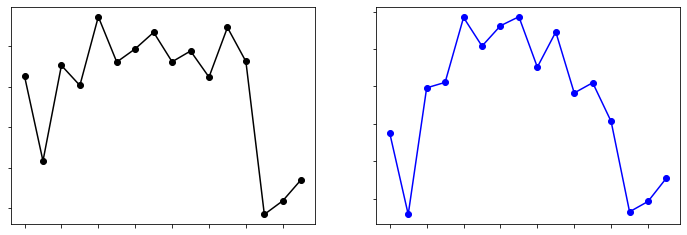

In [11]:
fig = plt.figure()
fig.suptitle('월별 카드 사용 총액 / 건수')

fig, ax_lst = plt.subplots(1, 2, figsize=(12,4))

ax_lst[0].plot(np.array(by_date["AMT"]), 'ko-')
ax_lst[1].plot(np.array(by_date["CNT"]), 'bo-')
plt.show()

In [12]:
by_area = pd.DataFrame(data.groupby(['CARD_SIDO_NM']).sum().reset_index(drop=False))

<Figure size 432x288 with 0 Axes>

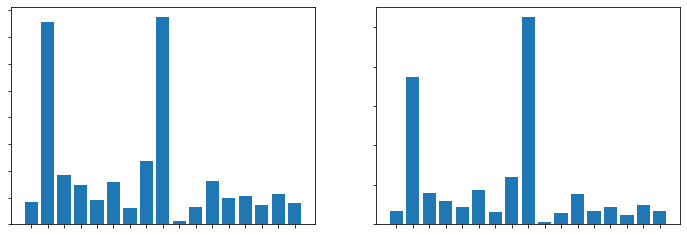

In [13]:
fig = plt.figure()
fig.suptitle('지역별 카드 사용 총액 / 건수')

fig, ax_lst = plt.subplots(1, 2, figsize=(12,4))

ax_lst[0].bar(by_area["CARD_SIDO_NM"], list(by_area["AMT"]))
ax_lst[1].bar(by_area["CARD_SIDO_NM"], list(by_area["CNT"]))
plt.show()

In [14]:
by_ind = pd.DataFrame(data.groupby(['STD_CLSS_NM', 'REG_YYMM']).sum())
by_ind_change = by_ind[["AMT", "CNT"]].pct_change().fillna(0)

In [15]:
by_ind = pd.DataFrame(data.groupby(['STD_CLSS_NM', 'REG_YYMM']).sum())
by_ind_change = by_ind[["AMT", "CNT"]].pct_change().fillna(0)
print(by_ind_change)

                           AMT       CNT
STD_CLSS_NM REG_YYMM                    
건강보조식품 소매업  201901    0.000000  0.000000
            201902   -0.105646 -0.099433
            201903   -0.180366  0.011145
            201904   -0.018749 -0.025641
            201905    0.281277  0.158889
...                        ...       ...
휴양콘도 운영업    201912    0.588254  0.755197
            202001    0.676276  0.642190
            202002   -0.626101 -0.593544
            202003   -0.670386 -0.723967
            202004    0.017943  0.020571

[656 rows x 2 columns]


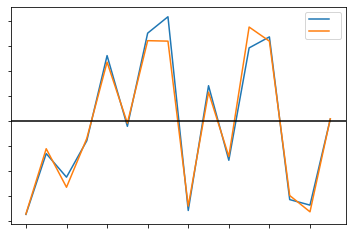

In [16]:
plot = by_ind_change.filter(like='휴양콘도', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

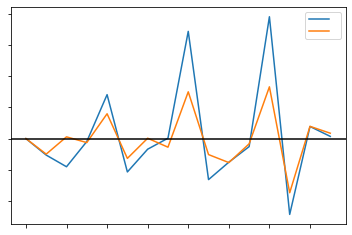

In [17]:
plot = by_ind_change.filter(like='건강보조', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

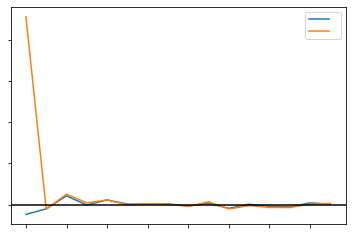

In [18]:
plot = by_ind_change.filter(like='편의점', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

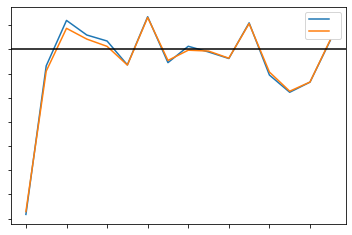

In [19]:
plot = by_ind_change.filter(like='택시', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

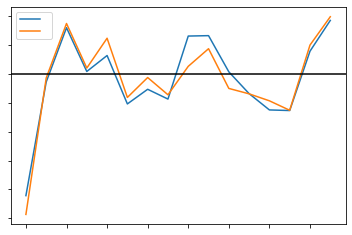

In [20]:
plot = by_ind_change.filter(like='스포츠 및', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

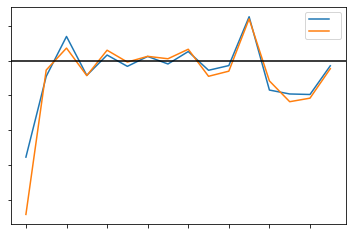

In [21]:
plot = by_ind_change.filter(like='일반유흥 주점업', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

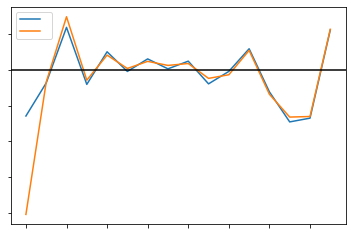

In [22]:
plot = by_ind_change.filter(like='마사지업', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

## Data Cleaning

In [23]:
data['year'] = tqdm_notebook(data["REG_YYMM"].apply(lambda x: jeju.grap_year(x)))
data['month'] = tqdm_notebook(data["REG_YYMM"].apply(lambda x: jeju.grap_month(x)))
data = data.drop(["REG_YYMM"], axis = 1)

/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [36]:
columns = ['year', 'month', 'CARD_SIDO_NM', "STD_CLSS_NM", 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC']
df = data.groupby(columns).sum().reset_index(drop=False)
df.head()

,year,month,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,2019,1,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,2019,1,강원,건강보조식품 소매업,강원,30s,1,2,44,5169295,45
2,2019,1,강원,건강보조식품 소매업,강원,30s,2,2,89,8618550,91
3,2019,1,강원,건강보조식품 소매업,강원,40s,1,2,3,454420,3
4,2019,1,강원,건강보조식품 소매업,강원,40s,1,3,53,6441165,60


In [37]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [38]:
df_num['COVID'] = np.empty((df_num.shape[0],1))

for i in tqdm(np.arange(0, df_num.shape[0])):
    if df_num.iloc[i,0] == 2019:
        df_num['COVID'][i] = 0
    elif df_num.iloc[i,1] == 1:
        df_num['COVID'][i] = 0
    else:
        df_num['COVID'][i] = 1

  0%|          | 0/1114451 [00:00<?, ?it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
 78%|███████▊  | 869815/1114451 [00:57<00:15, 15439.23it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
 85%|████████▍ | 942284/1114451 [01:02<00:12, 13638.99it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

([9, 11, 11, 8, 9, 11, 8, 10, 11, 10, 9, 10, 11, 9, 9])

In [39]:
df_num['holiday'] = np.empty((df_num.shape[0],1))

for i in tqdm(np.arange(0, df_num.shape[0])):
    if df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 1:
        df_num['holiday'][i] = 9
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 2:
        df_num['holiday'][i] = 11
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 3:
        df_num['holiday'][i] = 11
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 4:
        df_num['holiday'][i] = 8
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 5:
        df_num['holiday'][i] = 9
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 6:
        df_num['holiday'][i] = 11
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 7:
        df_num['holiday'][i] = 8
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 8:
        df_num['holiday'][i] = 10
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 9:
        df_num['holiday'][i] = 11
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 10:
        df_num['holiday'][i] = 10
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 11:
        df_num['holiday'][i] = 9
    elif df_num.iloc[i,0] == 2019 and df_num.iloc[i,1] == 12:
        df_num['holiday'][i] = 10
    elif df_num.iloc[i,0] == 2020 and df_num.iloc[i,1] == 1:
        df_num['holiday'][i] = 11
    elif df_num.iloc[i,0] == 2020 and df_num.iloc[i,1] == 2:
        df_num['holiday'][i] = 9
    elif df_num.iloc[i,0] == 2020 and df_num.iloc[i,1] == 3:
        df_num['holiday'][i] = 9
    elif df_num.iloc[i,0] == 2020 and df_num.iloc[i,1] == 4:
        df_num['holiday'][i] = 10

  0%|          | 0/1114451 [00:00<?, ?it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
  6%|▋         | 69848/1114451 [00:05<01:16, 13617.11it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
 13%|█▎        | 140696/1114451 [00:11<01:25, 11407.06it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [40]:
df_num['travel'] = np.empty((df_num.shape[0],1))

for i in tqdm(range(df_num.shape[0])):
    if df_num.iloc[i,2] == df_num.iloc[i,4]:
        df_num['travel'][i] = 0
    else:
        df_num['travel'][i] = 1

  0%|          | 0/1114451 [00:00<?, ?it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 1114451/1114451 [01:24<00:00, 13117.24it/s]


In [41]:
# 학습데이터 수 늘리기 위한 random noise 데이터 추가 생성
df_num2 = df_num.copy()
df_num2['AMT'] = df_num2['AMT'] + np.random.normal(0,200, df_num2.shape[0])
df_num3 = df_num.copy()
df_num3['AMT'] = df_num3['AMT'] + np.random.normal(0,200, df_num3.shape[0])
df_num4 = df_num.copy()
df_num4['AMT'] = df_num4['AMT'] + np.random.normal(0,200, df_num4.shape[0])
df_num5 = df_num.copy()
df_num5['AMT'] = df_num5['AMT'] + np.random.normal(0,200, df_num5.shape[0])

df_com = pd.concat([df_num, df_num2, df_num3, df_num4, df_num5], axis=0)

In [42]:
(df_com['AMT']<0).sum()

0

## Model Fitting

In [43]:
import lightgbm as lgb

train_num = df_com.sample(frac=1, random_state=0)
x = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
y = np.log1p(train_num['AMT'])

In [44]:
k = int(len(x)*0.9)

x_train = x[:k]
y_train = y[:k]
x_val = x[k:]
y_val = y[k:]

In [45]:
train_ds = lgb.Dataset(x_train, label=y_train, categorical_feature=categ, free_raw_data=False)
val_ds = lgb.Dataset(x_val, label=y_val, categorical_feature=categ, free_raw_data=False)

In [46]:
params = {
            'learning_rate' : 0.05,
            'boosting_type': 'gbdt',
            'objective': 'tweedie',
            'tweedie_variance_power': 1.1,
            'metric': 'rmse',
            'sub_row' : 0.75,
            'lambda_l2' : 0.1
        }

In [47]:
model = lgb.train(params,
                  train_ds,
                  3000,
                  val_ds,
                  verbose_eval = 100,
                  early_stopping_rounds = 100
                 )

/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 1.41155
[200]	valid_0's rmse: 1.17661
[300]	valid_0's rmse: 1.05904
[400]	valid_0's rmse: 0.984715
[500]	valid_0's rmse: 0.938368
[600]	valid_0's rmse: 0.904037
[700]	valid_0's rmse: 0.878181
[800]	valid_0's rmse: 0.855114
[900]	valid_0's rmse: 0.836152
[1000]	valid_0's rmse: 0.82039
[1100]	valid_0's rmse: 0.804813
[1200]	valid_0's rmse: 0.791433
[1300]	valid_0's rmse: 0.779618
[1400]	valid_0's rmse: 0.769335
[1500]	valid_0's rmse: 0.759618
[1600]	valid_0's rmse: 0.751435
[1700]	valid_0's rmse: 0.743731
[1800]	valid_0's rmse: 0.737399
[1900]	valid_0's rmse: 0.729872
[2000]	valid_0's rmse: 0.724272
[2100]	valid_0's rmse: 0.718503
[2200]	valid_0's rmse: 0.712833
[2300]	valid_0's rmse: 0.707731
[2400]	valid_0's rmse: 0.703289
[2500]	valid_0's rmse: 0.698479
[2600]	valid_0's rmse: 0.694606
[2700]	valid_0's rmse: 0.690806
[2800]	valid_0's rmse: 0.687399
[2900]	valid_0's rmse: 0.683727
[3000]	valid_0's rmse: 

In [48]:
import joblib

joblib.dump(model, 'jeju_lgb.pkl')

['jeju_lgb.pkl']

In [49]:
# 예측 템플릿 만들기
years         = [2020]
months        = [7]
CARD_SIDO_NMs = pd.Series(df_num['CARD_SIDO_NM'].unique())
STD_CLSS_NMs  = pd.Series(df_num['STD_CLSS_NM'].unique())
HOM_SIDO_NMs  = pd.Series(df_num['HOM_SIDO_NM'].unique())
AGEs          = pd.Series(df_num['AGE'].unique())
SEX_CTGO_CDs  = pd.Series(df_num['SEX_CTGO_CD'].unique())
FLCs          = pd.Series(df_num['FLC'].unique())


temp = []
for year in years:
    for month in months:
        for CARD_SIDO_NM in CARD_SIDO_NMs:
            for STD_CLSS_NM in STD_CLSS_NMs:
                for HOM_SIDO_NM in HOM_SIDO_NMs:
                    for AGE in AGEs:
                        for SEX_CTGO_CD in SEX_CTGO_CDs:
                            for FLC in FLCs:
                                temp.append([year, month, CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC])

                                
temp = pd.DataFrame(data=temp, columns = x.columns[:-3])

In [50]:
temp['COVID'] = 1

temp['holiday'] = np.empty((temp.shape[0],1))
temp['travel'] = np.empty((temp.shape[0],1))

In [51]:
for i in tqdm(np.arange(0, temp.shape[0])):
    temp['holiday'][i] = 8

  0%|          | 0/829430 [00:00<?, ?it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 829430/829430 [00:40<00:00, 20618.32it/s]


In [52]:
for i in tqdm(range(temp.shape[0])):
    if temp.iloc[i,2] == temp.iloc[i,4]:
        temp['travel'][i] = 0
    else:
        temp['travel'][i] = 1

  0%|          | 0/829430 [00:00<?, ?it/s]/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
100%|██████████| 829430/829430 [00:56<00:00, 14783.73it/s]


In [53]:
temp.head()

,year,month,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,COVID,holiday,travel
0,2020,7,0,0,0,1,1,1,1,8.0,0.0
1,2020,7,0,0,0,1,1,2,1,8.0,0.0
2,2020,7,0,0,0,1,1,3,1,8.0,0.0
3,2020,7,0,0,0,1,1,4,1,8.0,0.0
4,2020,7,0,0,0,1,1,5,1,8.0,0.0


In [54]:
# 예측
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [55]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [56]:
df_grp = data.groupby(['year', 'month', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(
    drop=False).iloc[:,[0,1,2,3,7]]
df_grp['REG_YYMM'] = df_grp['year']*100 + df_grp['month']
df_grp = df_grp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
df_grp = df_grp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)
df_grp.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,148354746
1,201901,강원,골프장 운영업,1229200312
2,201901,강원,과실 및 채소 소매업,1286979106
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770
4,201901,강원,그외 기타 스포츠시설 운영업,13101500


In [57]:
for i in tqdm(np.arange(0, temp.shape[0])):
    if ((temp.iloc[i, 1] == df_grp.iloc[:, 1]) & 
        (temp.iloc[i,2]  == df_grp.iloc[:, 2])).sum() == 0:
        temp.iloc[i,3] = 0

100%|██████████| 697/697 [00:00<00:00, 736.04it/s]


In [ ]:
(temp['AMT']==0).sum()

In [ ]:
# 제출 파일 만들기
submission = pd.read_csv('./jeju_data_ver1/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')



In [ ]:
df_04 = df_grp[df_grp['REG_YYMM']==202004]

for i in tqdm(range(submission[submission['REG_YYMM']==202004].shape[0])):
    for j in range(df_04.shape[0]):
        if (submission.iloc[i,1] == df_04.iloc[j,1]) & (submission.iloc[i,2] == df_04.iloc[j,2]):
            submission.iloc[i,-1] = df_04.iloc[j,-1]

In [ ]:
submission = submission.fillna(0)

In [ ]:
submission.index.name = 'id'
submission.to_csv('submission12.csv', encoding='utf-8-sig')
submission.head()